In [107]:
import pandas as pd
import mysql.connector as cnn

In [108]:
cnx = cnn.connect(
    host="127.0.0.1",
    port=3306,
    user="root",
    password="coderhouse")

In [109]:
query:str = "SELECT * FROM pagos.vw_analisis_estadistico"

In [110]:
# Get a cursor
cur = cnx.cursor()

# Execute a query
cur.execute(query)

# Fetch one result
rows = cur.fetchall()

for row in rows:
    print(row)


(2, "O'Doogan", datetime.date(2020, 12, 18), Decimal('491938.85'), Decimal('245969.43'), Decimal('0.00'), '0.00 %')
(2, 'Telfer', datetime.date(2021, 11, 23), Decimal('315915.87'), Decimal('249617.16'), Decimal('-176022.98'), '-35.78 %')
(2, 'Fadian', datetime.date(2022, 12, 25), Decimal('125152.46'), Decimal('321309.04'), Decimal('-190763.41'), '-60.38 %')
(2, 'Jantel', datetime.date(2023, 11, 21), Decimal('105842.47'), Decimal('308824.23'), Decimal('-19309.99'), '-15.43 %')
(2, 'Gingles', datetime.date(2024, 10, 13), Decimal('396641.09'), Decimal('320806.19'), Decimal('290798.62'), '274.75 %')
(3, 'MacKegg', datetime.date(2020, 11, 22), Decimal('445465.55'), Decimal('453865.33'), Decimal('0.00'), '0.00 %')
(3, 'Di Claudio', datetime.date(2021, 12, 24), Decimal('178740.71'), Decimal('281649.26'), Decimal('-266724.84'), '-59.88 %')
(3, 'Searl', datetime.date(2022, 12, 28), Decimal('326607.79'), Decimal('283089.13'), Decimal('147867.08'), '82.73 %')
(3, 'Cuerdale', datetime.date(2023, 1

In [111]:
views_data = pd.DataFrame(rows)


views_data = views_data.astype({
    0: "category",
    3: float,
    4: float,
    5: float,
    6: "category"
})


views_data[2] = pd.to_datetime(views_data[2])

views_data = views_data.rename( columns={0:"id_coche",1:"nombre_usuario", 2:"fecha_pago",3:"pago",4:"avg_pago",5:"diff_pago",6:"diff_perc"})

In [112]:
views_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id_coche        93 non-null     category      
 1   nombre_usuario  93 non-null     object        
 2   fecha_pago      93 non-null     datetime64[ns]
 3   pago            93 non-null     float64       
 4   avg_pago        93 non-null     float64       
 5   diff_pago       93 non-null     float64       
 6   diff_perc       87 non-null     category      
dtypes: category(2), datetime64[ns](1), float64(3), object(1)
memory usage: 7.2+ KB


In [113]:
views_data.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
fecha_pago,93,2022-12-05 19:36:46.451612928,2020-11-16 00:00:00,2021-11-23 00:00:00,2022-12-18 00:00:00,2023-12-22 00:00:00,2024-10-25 00:00:00,NaN
pago,93.0,289256.447097,0.0,206001.02,298948.88,403606.0,494608.97,134667.167608
avg_pago,93.0,277370.722688,163579.78,245305.65,274038.97,307749.16,453865.33,52681.350003
diff_pago,93.0,-18578.888495,-493216.77,-134637.49,0.0,83987.08,405179.91,170761.922786


In [114]:
views_data.describe(include="category").transpose()

,count,unique,top,freq
id_coche,93,19,2,5
diff_perc,87,62,0.00 %,19


In [115]:

# Close connection
cnx.close()

In [116]:
views_data

,id_coche,nombre_usuario,fecha_pago,pago,avg_pago,diff_pago,diff_perc
0,2,O'Doogan,2020-12-18,491938.85,245969.43,0.00,0.00 %
1,2,Telfer,2021-11-23,315915.87,249617.16,-176022.98,-35.78 %
2,2,Fadian,2022-12-25,125152.46,321309.04,-190763.41,-60.38 %
3,2,Jantel,2023-11-21,105842.47,308824.23,-19309.99,-15.43 %
4,2,Gingles,2024-10-13,396641.09,320806.19,290798.62,274.75 %
...,...,...,...,...,...,...,...
88,20,Hawtry,2020-12-30,382154.10,393862.25,0.00,0.00 %
89,20,Tattersdill,2021-11-27,334127.76,353252.12,-48026.34,-12.57 %
90,20,Lecordier,2022-12-27,214644.53,212496.95,-119483.23,-35.76 %
91,20,Mash,2023-12-26,238723.54,296673.18,24079.01,11.22 %


In [120]:
views_data = views_data.astype({"id_coche":int})

<Axes: xlabel='nombre_usuario'>

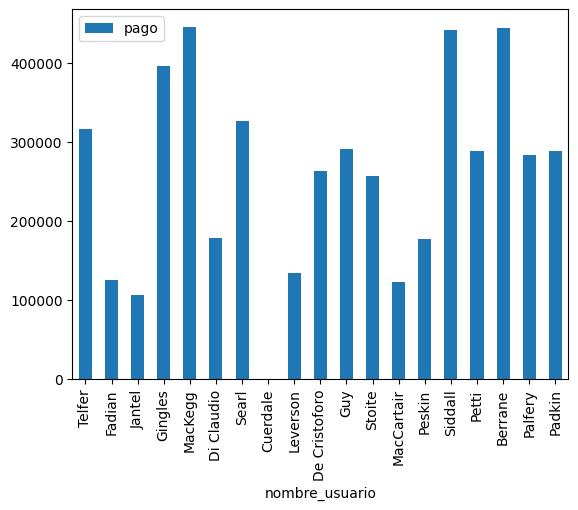

In [128]:
views_data.iloc[1:20,:].plot.bar(x="nombre_usuario",y="pago")

In [129]:
views_data.iloc[1:20,:].to_csv("data final.csv")